#### IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

#### Read the Datset and Store it to a Variable

In [2]:
dt=pd.read_csv('Dataset .csv')
dt

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


#### Identifying the number of Rows and Columns.

In [3]:
dt.shape

(9551, 21)

#### Identifying the number of Unique values

In [4]:
dt.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

#### Identifying and Analyzing Dataset Data Types

In [5]:
dt.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

#### Checking Any Duplicated Values Presented in the Dataset

In [6]:
dt.duplicated().sum()

0

#### Informations About the Dataset

In [7]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

#### Descriptive Statistical for Dataset Insights

In [8]:
dt.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


## Identifying and Handling Missing Values

In [9]:
dt.isna().sum()  # 9 Missing Values in the column Cusines 

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [10]:
dt=dt.dropna()
dt

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


### Exploring the distribution of categorical variables like Country Code

In [11]:
# # Top 10 most frequent values in 'Country Code'
CC=dt['Country Code'].value_counts().head(10)
CC

Country Code
1      8652
216     425
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
Name: count, dtype: int64

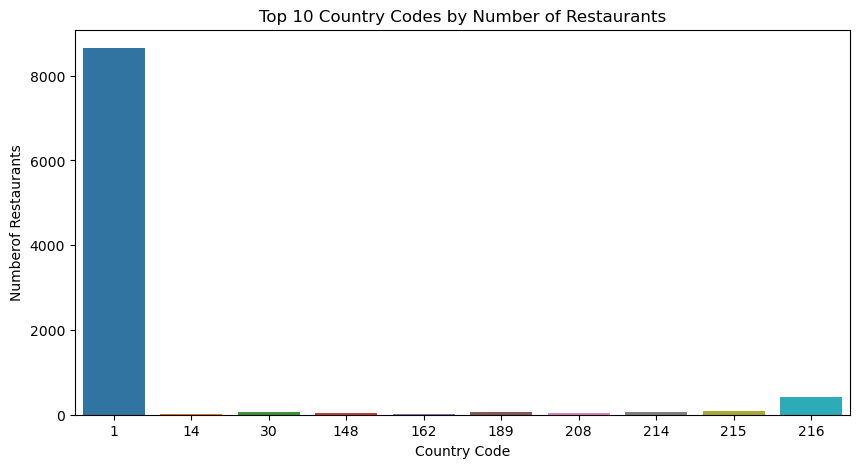

In [12]:
#plot
plt.figure(figsize=(10,5))
sns.barplot(x=CC.index,y=CC.values)
plt.xlabel('Country Code')
plt.ylabel('Numberof Restaurants')
plt.title('Top 10 Country Codes by Number of Restaurants')
plt.show()

### Exploring the Distribution of Categorical variables Like City

In [13]:
# Top 10 most frequent cities
City=dt['City'].value_counts().head(10)
City

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Amritsar          21
Bhubaneshwar      21
Lucknow           21
Name: count, dtype: int64

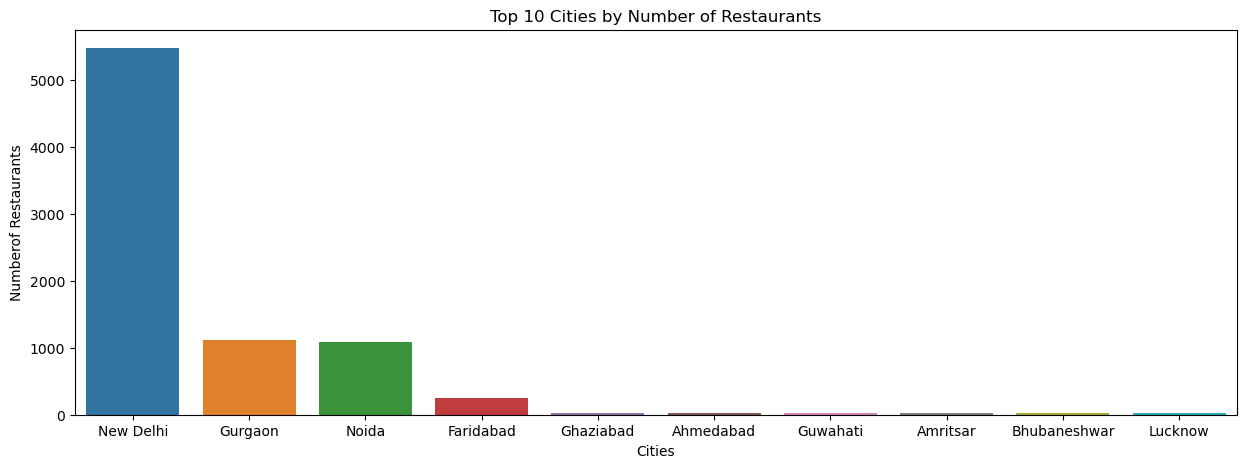

In [14]:
#Plot
plt.figure(figsize=(15,5))
sns.barplot(x=City.index,y=City.values)
plt.xlabel('Cities')
plt.ylabel('Numberof Restaurants')
plt.title('Top 10 Cities by Number of Restaurants')
plt.show()

### Exploring the Distribution of categorical variables like Cusines

In [15]:
#Top 10 Most frequent Cusines
Cusines=dt['Cuisines'].value_counts().head(10)
Cusines

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

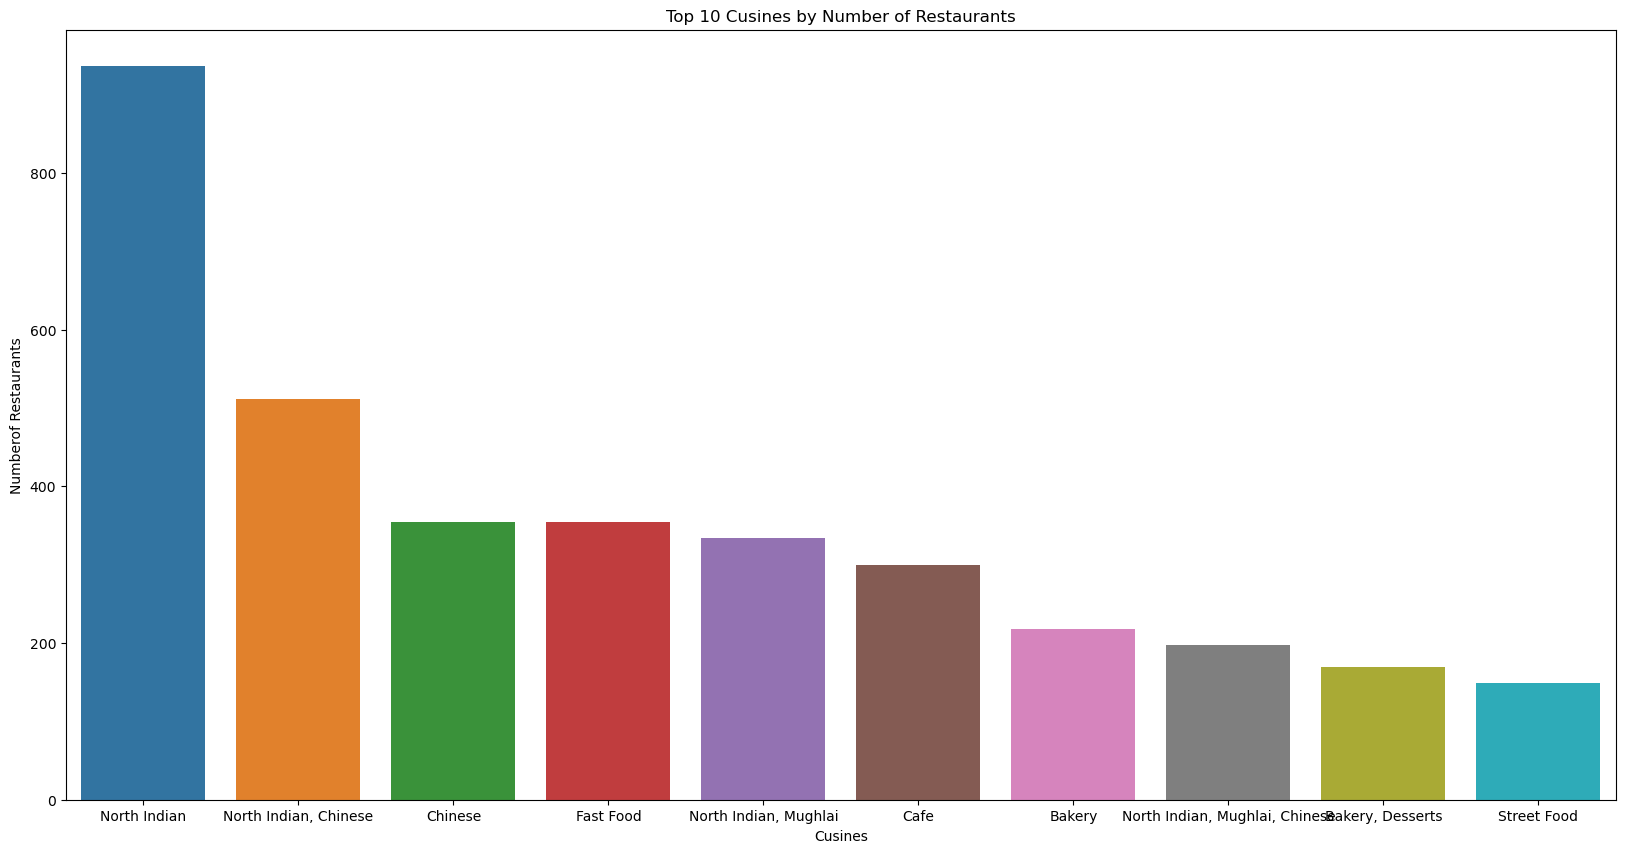

In [16]:
#plot
plt.figure(figsize=(20,10))
sns.barplot(x=Cusines.index,y=Cusines.values)
plt.xlabel('Cusines')
plt.ylabel('Numberof Restaurants')
plt.title('Top 10 Cusines by Number of Restaurants')
plt.show()

### Visualize the locations of restaurants on map using latitude and longitude information

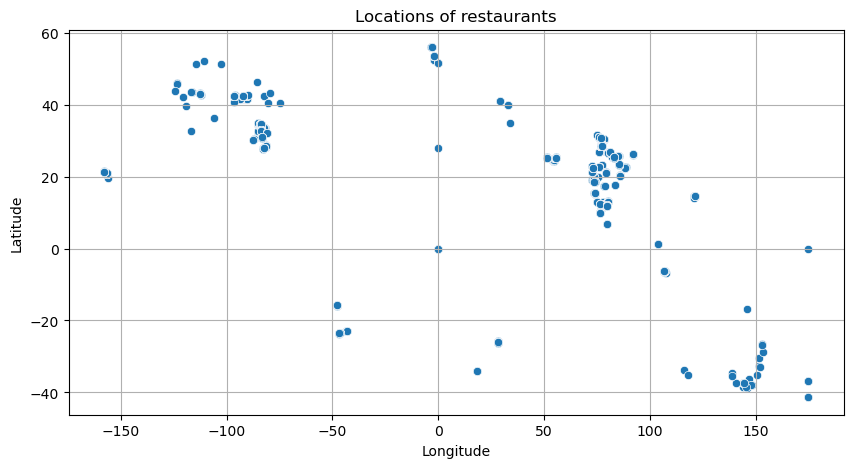

In [17]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Longitude',y='Latitude',data=dt)
plt.title('Locations of restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

### Correlation Between Latitude,Longitude,Rating

In [18]:
Correlation=dt[['Longitude','Latitude','Aggregate rating']].corr()
Correlation

,Longitude,Latitude,Aggregate rating
Longitude,1.000000,0.045415,-0.114733
Latitude,0.045415,1.000000,0.000197
Aggregate rating,-0.114733,0.000197,1.000000


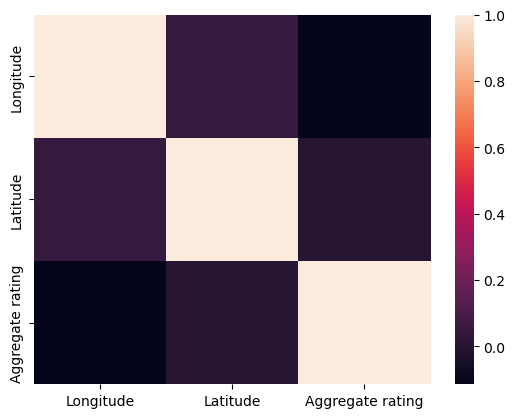

In [19]:
sns.heatmap(Correlation)
plt.show()

## Level 2

### Percentage Analysis of Table Booking and Online Delivery Availability

In [20]:
Table_booking_percentage=dt['Has Table booking'].value_counts(normalize=True)*100

Online_booking_percentage=dt['Has Online delivery'].value_counts(normalize=True)*100

In [21]:
print('Table Booking Percentage',Table_booking_percentage)

Table Booking Percentage Has Table booking
No     87.864179
Yes    12.135821
Name: proportion, dtype: float64


In [22]:
print('Online Delivery Percentage',Online_booking_percentage)

Online Delivery Percentage Has Online delivery
No     74.313561
Yes    25.686439
Name: proportion, dtype: float64


### Average Rating of Restaurants with table booking and Without

In [23]:
Avg_rating=dt.groupby('Has Table booking')['Aggregate rating'].mean()
print(Avg_rating)

Has Table booking
No     2.557956
Yes    3.441969
Name: Aggregate rating, dtype: float64


### Online Delivery by Price Range Analysis

In [24]:
Online_delivery_Analyzes=dt.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack()*100
pd.DataFrame(Online_delivery_Analyzes)

Has Online delivery,No,Yes
Price range,,
1,84.204597,15.795403
2,58.689367,41.310633
3,70.747331,29.252669
4,90.955631,9.044369


### Determining the most common price range amoung all restaurants.

In [25]:
DF=dt['Price range'].value_counts(normalize=True)*100
pd.DataFrame(DF)
#The most common price range among all the restaurants is 1.

,proportion
Price range,
1,46.510166
2,32.624188
3,14.724376
4,6.141270


### Average Rating by Price Range

In [26]:
Avg=dt.groupby('Price range')['Aggregate rating'].mean()
print(Avg)

Price range
1    1.997476
2    2.941054
3    3.682633
4    3.817918
Name: Aggregate rating, dtype: float64


### Analysis of Rating Colors with the Highest Average Ratings Across Price Ranges

In [27]:
avg_rating_color_price=dt.groupby(['Price range','Rating color'])['Aggregate rating'].mean().reset_index()
avg_rating_color_price

,Price range,Rating color,Aggregate rating
0,1,Dark Green,4.667742
1,1,Green,4.157639
2,1,Orange,3.039894
3,1,Red,2.293548
4,1,White,0.000000
5,1,Yellow,3.661056
6,2,Dark Green,4.627536
7,2,Green,4.159385
8,2,Orange,3.048491
9,2,Red,2.300000


In [28]:
high_avg_rating=avg_rating_color_price.loc[avg_rating_color_price.groupby('Price range')['Aggregate rating'].idxmax()]

In [29]:
high_avg_rating

,Price range,Rating color,Aggregate rating
0,1,Dark Green,4.667742
6,2,Dark Green,4.627536
12,3,Dark Green,4.646032
18,4,Dark Green,4.709459


### Feature Engineering: Extracting Length-Based Features

In [30]:
dt['Restaurant Name Length']=dt['Restaurant Name'].str.len()
dt['Address Length']=dt['Address'].str.len()

In [31]:
dt[['Restaurant Name','Restaurant Name Length','Address','Address Length']]

,Restaurant Name,Restaurant Name Length,Address,Address Length
0,Le Petit Souffle,16,"Third Floor, Century City Mall, Kalayaan Avenu...",71
1,Izakaya Kikufuji,16,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",67
2,Heat - Edsa Shangri-La,22,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",56
3,Ooma,4,"Third Floor, Mega Fashion Hall, SM Megamall, O...",70
4,Sambo Kojin,11,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",64
...,...,...,...,...
9546,Naml۱ Gurme,11,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",103
9547,Ceviz A��ac۱,12,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",77
9548,Huqqa,5,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",73
9549,A���k Kahve,11,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",75


### Feature Engineering: Encoding Categorical Variables

In [32]:
le=LabelEncoder()

dt['Has Table booking']=le.fit_transform(dt['Has Table booking'])
dt['Has Online delivery']=le.fit_transform(dt['Has Online delivery'])
dt['Is delivering now']=le.fit_transform(dt['Is delivering now'])
dt['Switch to order menu']=le.fit_transform(dt['Switch to order menu'])
dt['Rating color']=le.fit_transform(dt['Rating color'])
dt['Rating text']=le.fit_transform(dt['Rating text'])
dt['Restaurant Name']=le.fit_transform(dt['Restaurant Name'])
dt['Locality']=le.fit_transform(dt['Locality'])
dt['Cuisines']=le.fit_transform(dt['Cuisines'])

In [33]:
dt[['Has Online delivery','Has Table booking']]

,Has Online delivery,Has Table booking
0,0,1
1,0,1
2,0,1
3,0,0
4,0,1
...,...,...
9546,0,0
9547,0,0
9548,0,0
9549,0,0


# Level 3

### Task 1

### Identifying Unwanted Columns and Droping Them

In [34]:
dt=dt.drop(['Restaurant ID', 'Country Code', 'City', 'Address', 'Locality Verbose', 'Currency','Restaurant Name Length','Address Length'],axis=1)
dt

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,3742,171,121.027535,14.565443,920,1100,1,0,0,0,3,4.8,0,1,314
1,3167,592,121.014101,14.553708,1111,1200,1,0,0,0,3,4.5,0,1,591
2,2892,308,121.056831,14.581404,1671,4000,1,0,0,0,4,4.4,1,5,270
3,4700,860,121.056475,14.585318,1126,1500,0,0,0,0,4,4.9,0,1,365
4,5515,860,121.057508,14.584450,1122,1500,1,0,0,0,4,4.8,0,1,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,4436,516,28.977392,41.022793,1813,80,0,0,0,0,3,4.1,1,5,788
9547,1310,551,29.041297,41.009847,1824,105,0,0,0,0,3,4.2,1,5,1034
9548,3063,553,29.034640,41.055817,1110,170,0,0,0,0,4,3.7,5,2,661
9549,512,553,29.036019,41.057979,1657,120,0,0,0,0,4,4.0,1,5,901


### Already Handled the Missing Values before

In [35]:
#setting the taregts

x=dt.drop('Aggregate rating',axis=1)
y=dt['Aggregate rating']

In [36]:
x

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Rating color,Rating text,Votes
0,3742,171,121.027535,14.565443,920,1100,1,0,0,0,3,0,1,314
1,3167,592,121.014101,14.553708,1111,1200,1,0,0,0,3,0,1,591
2,2892,308,121.056831,14.581404,1671,4000,1,0,0,0,4,1,5,270
3,4700,860,121.056475,14.585318,1126,1500,0,0,0,0,4,0,1,365
4,5515,860,121.057508,14.584450,1122,1500,1,0,0,0,4,0,1,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,4436,516,28.977392,41.022793,1813,80,0,0,0,0,3,1,5,788
9547,1310,551,29.041297,41.009847,1824,105,0,0,0,0,3,1,5,1034
9548,3063,553,29.034640,41.055817,1110,170,0,0,0,0,4,5,2,661
9549,512,553,29.036019,41.057979,1657,120,0,0,0,0,4,1,5,901


In [37]:
y

0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 9542, dtype: float64

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=80)

## Using Linear Regression Model

In [39]:
model=LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.44904200398637106

## Using Decision Tree Regression Model

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [41]:
model2=DecisionTreeRegressor(max_depth=2)
model2.fit(x_train,y_train)
model2.score(x_test,y_test)

0.949424088201

## Using Random Forest Regression Model

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [43]:
model3=RandomForestRegressor(n_estimators=10)
model3.fit(x_train,y_train)
model3.score(x_test,y_test)

0.9863870673509263

## Comparing Different Models using Cross Validation

In [44]:
lin_score1=cross_val_score(LinearRegression(),X=x,y=y,cv=4)
Dt_score1=cross_val_score(DecisionTreeRegressor(),X=x,y=y,cv=4)
Rf_score1=cross_val_score(RandomForestRegressor(),X=x,y=y,cv=4)

In [45]:
print(np.mean(lin_score1))
print(np.mean(Dt_score1))
print(np.mean(Rf_score1))

0.24395581001939834
0.9721060239117103
0.9856953399626334


## Model Comparison and Performance Analysis

### Linear Regression: The model underperformed and showed signs of underfitting,       indicating it was too simplistic to capture the patterns in the data adequately.

### Decision Tree: Achieved an impressive accuracy of 94%, effectively fitting the data and capturing its complexity without major overfitting issues.

### Random Forest: Although it provided robust performance, the model exhibited signs of overfitting, likely due to over-complexity in handling the datase

## Task 2: Customer Preference Analysis

In [46]:
dt1=pd.read_csv('Dataset .csv')
dt1=dt1.dropna()

In [47]:
cuisine_rating=dt1.groupby('Cuisines')['Aggregate rating'].mean().reset_index()
pd.DataFrame(cuisine_rating)

,Cuisines,Aggregate rating
0,Afghani,0.725
1,"Afghani, Mughlai, Chinese",0.000
2,"Afghani, North Indian",0.000
3,"Afghani, North Indian, Pakistani, Arabian",0.000
4,African,4.700
...,...,...
1820,"Western, Asian, Cafe",4.200
1821,"Western, Fusion, Fast Food",3.200
1822,World Cuisine,4.900
1823,"World Cuisine, Mexican, Italian",4.400


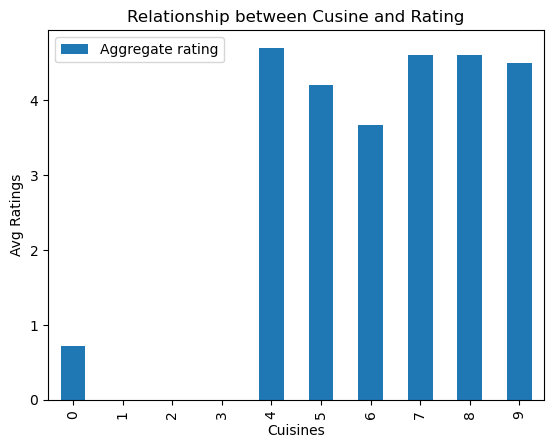

In [48]:
# visualize

top_10_cuisines=cuisine_rating.head(10)

top_10_cuisines.plot.bar()
plt.xlabel("Cuisines")
plt.ylabel("Avg Ratings")
plt.title("Relationship between Cusine and Rating")
plt.show()

### Task 2: Most Popular Cuisines Based on Customer Votes

In [49]:
#Identifying Popular Cusines
Popular_Cuisines=dt1.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)
pd.DataFrame(Popular_Cuisines.head(10))

,Votes
Cuisines,
"North Indian, Mughlai",53747
North Indian,46241
"North Indian, Chinese",42012
Cafe,30657
Chinese,21925
"North Indian, Mughlai, Chinese",20115
Fast Food,17852
South Indian,16433
"Mughlai, North Indian",15275


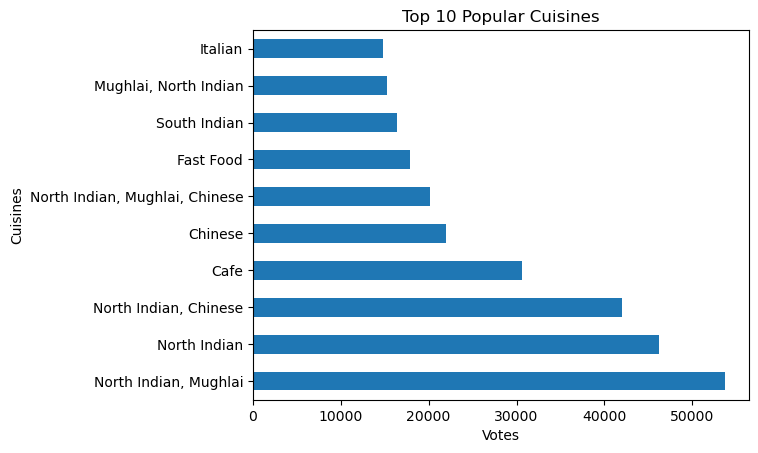

In [50]:
Popular_Cuisines.head(10).plot.barh()
plt.title("Top 10 Popular Cuisines")
plt.xlabel('Votes')
plt.ylabel('Cuisines')
plt.show()

### Task 2:Cuisines with Consistently Higher Ratings

In [51]:
Cuisines_Highest_rating=dt1.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

pd.DataFrame(Cuisines_Highest_rating.head(10))

,Aggregate rating
Cuisines,
"Italian, Deli",4.9
"Hawaiian, Seafood",4.9
"American, Sandwich, Tea",4.9
"Continental, Indian",4.9
"European, Asian, Indian",4.9
"European, Contemporary",4.9
"European, German",4.9
"BBQ, Breakfast, Southern",4.9
"American, Coffee and Tea",4.9


#### All the Above Cuisines Have got Highest Ratings by Customers


# Task 3:Data Visualization

### Task 3:Visualizing the Distribution of Aggregate Ratings

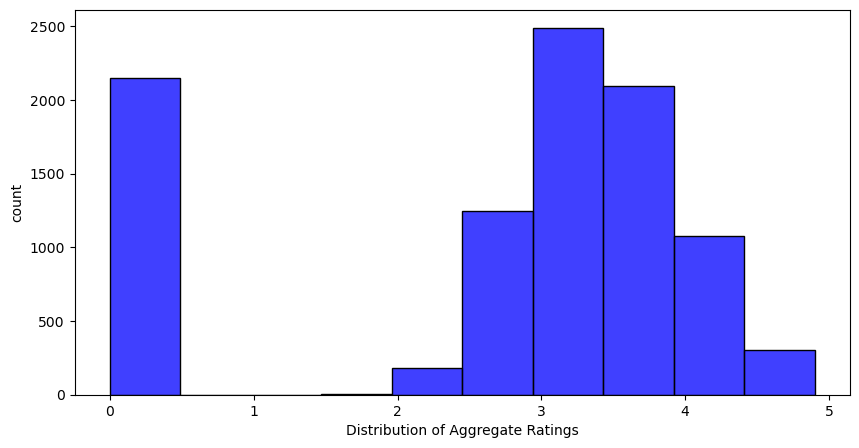

In [52]:
plt.figure(figsize=(10,5))
sns.histplot(x="Aggregate rating",data=dt,bins=10,color="blue",edgecolor='black')
plt.xlabel("Distribution of Aggregate Ratings")
plt.ylabel('count')
plt.show()

### Task 3: Analyzing the Average Votes for Different Ratings

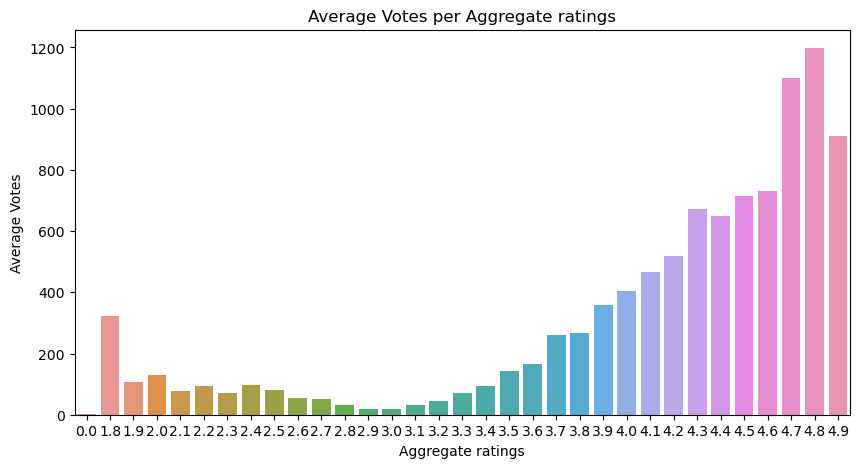

In [53]:
plt.figure(figsize=(10,5))

ratings=dt.groupby('Aggregate rating')['Votes'].mean().reset_index()

sns.barplot(x='Aggregate rating',y='Votes',data=ratings)
plt.title('Average Votes per Aggregate ratings')
plt.xlabel("Aggregate ratings")
plt.ylabel('Average Votes')
plt.show()

### Task 3:Analyzing Average Ratings Across Different Cuisines

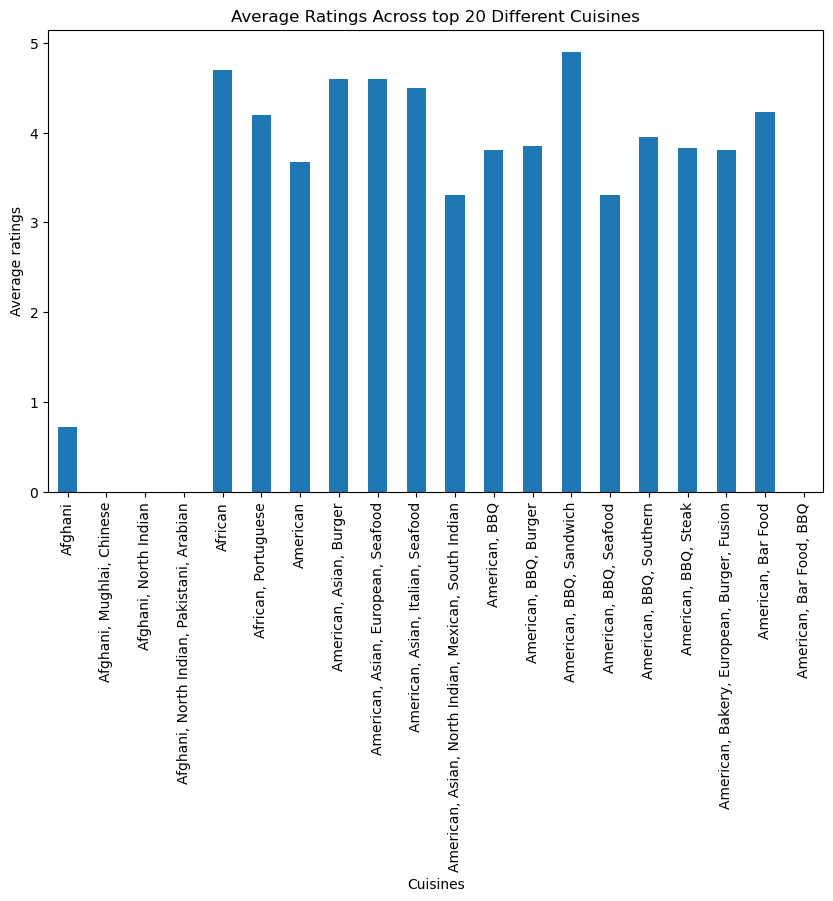

In [61]:
cuisine_rating=dt1.groupby('Cuisines')['Aggregate rating'].mean().head(20)
plt.figure(figsize=(10,6))

cuisine_rating.plot.bar()
plt.xlabel('Cuisines')
plt.ylabel('Average ratings')
plt.title('Average Ratings Across top 20 Different Cuisines')
plt.show()


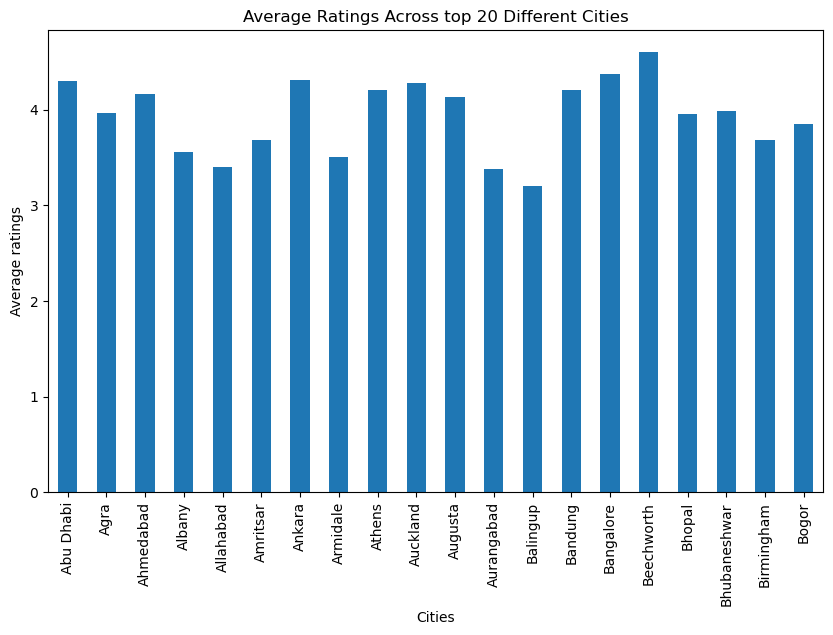

In [62]:
city_rating=dt1.groupby('City')['Aggregate rating'].mean().head(20)
plt.figure(figsize=(10,6))

city_rating.plot.bar()
plt.xlabel('Cities')
plt.ylabel('Average ratings')
plt.title('Average Ratings Across top 20 Different Cities')
plt.show()


### Task3: Exploring Feature Relationships with the Target Variable

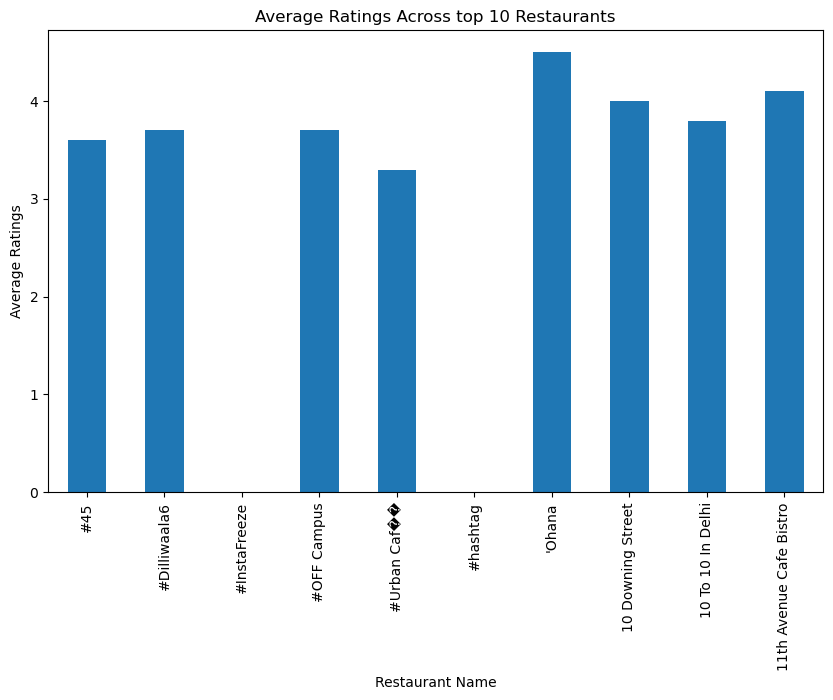

In [67]:
Restaurant_rating=dt1.groupby('Restaurant Name')['Aggregate rating'].mean().head(10)

plt.figure(figsize=(10,6))
Restaurant_rating.plot.bar()
plt.xlabel('Restaurant Name')
plt.ylabel('Average Ratings')
plt.title("Average Ratings Across top 10 Restaurants")
plt.show()


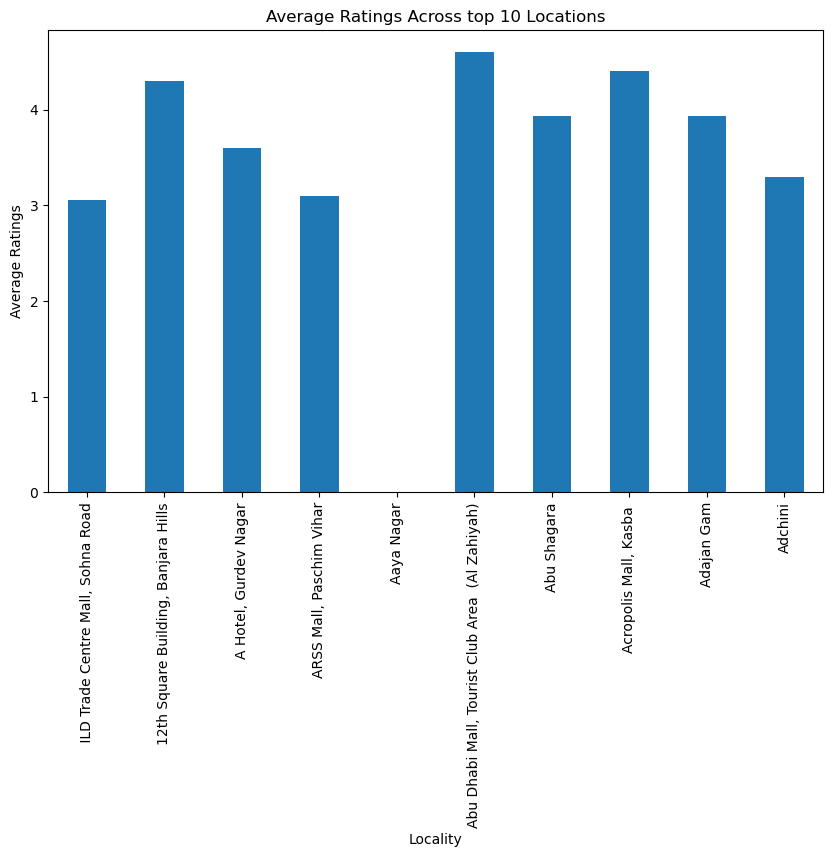

In [69]:
location_rating=dt1.groupby('Locality')['Aggregate rating'].mean().head(10)

plt.figure(figsize=(10,6))
location_rating.plot.bar()
plt.xlabel('Locality')
plt.ylabel('Average Ratings')
plt.title("Average Ratings Across top 10 Locations")
plt.show()
